Usairim Isani <br>
Student number 2206784 <br>
February, 6, 2023  <br>

# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2023

### Prediction of the metal ion content from multi-parameter data
##### Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), for each sample using number of neighbors k = 3.<br> 

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score. (Using sklearn.preprocessing.StandardScaler is allowed)
    - Implement your own Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement your own Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook .ipynb notebook and as a PDF-file made from it.
    - Submit to moodle your solution on ** Wednesday 8 of February ** at the latest.

## Import libraries

In [146]:
#In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


## Read and visualize the dataset

In [147]:
#In this cell read the file Water_data.csv
#Print the dataset dimesions (i.e. number of rows and columns)
#Print the first 5 rows of the dataset

water_df = pd.read_csv("./Water_data.csv")
print(f'Rows     : {water_df.shape[0]}\nColumns  : {water_df.shape[1]}\n')

features = ['Mod1', 'Mod2', 'Mod3']
labels = ['c_total', 'Cd', 'Pb']

water_df.head(5)


Rows     : 225
Columns  : 6



,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0,0.0,0.0,9945,119,72335
1,0,0.0,0.0,10786,117,82977
2,0,0.0,0.0,10812,120,98594
3,14,0.0,14.0,9742,127,154323
4,14,0.0,14.0,8495,120,131672


#### To show understanding of the data, answer the following questions:
- How many different mixtures of Cadmium (Cd) and Lead (Pb) were measured? <br>
- How many total concentrations (c_total) were measured? <br>
- How many mixtures have less than 4 replicas? <br>
- Make plots of Lead (Pb) and Cadmium (Cd) mixtures for low and high concentrations. <br>
Where low concentrations are those with c_total <= 100, while in high concentration c_total > 100.<br>
Hint: plots are similar to the ones presented in the video lecture.  

In [148]:
# In this cell write the code to answer the previous questions and print the answers.

mixtures = water_df.groupby(["Cd", "Pb"]).count()

print(mixtures)
print()
print(f'There are {mixtures.shape[0]} Mixtures of Cd and Pb\n\n')




               c_total  Mod1  Mod2  Mod3
Cd     Pb                               
0.0    0.0           3     3     3     3
       14.0          3     3     3     3
       20.0          3     3     3     3
       35.0          3     3     3     3
       50.0          4     4     4     4
...                ...   ...   ...   ...
2000.0 0.0           3     3     3     3
       3000.0        3     3     3     3
3000.0 2000.0        3     3     3     3
4000.0 1000.0        3     3     3     3
5000.0 0.0           3     3     3     3

[67 rows x 4 columns]

There are 67 Mixtures of Cd and Pb




In [149]:
c_total = water_df.groupby(["c_total"])["c_total"].count()

print(c_total)
print()
print(f'There are {c_total.shape[0]} concentrations\n\n')

c_total
0        3
14      18
20      18
35      18
50      24
70      24
100     24
200     24
500     18
1000    18
2000    18
5000    18
Name: c_total, dtype: int64

There are 12 concentrations




In [150]:
replicas_less_4 = mixtures[mixtures["c_total"] < 4].shape[0]
print(f'Mixtures with less than 4 replicas are : {replicas_less_4}\n\n')

Mixtures with less than 4 replicas are : 43




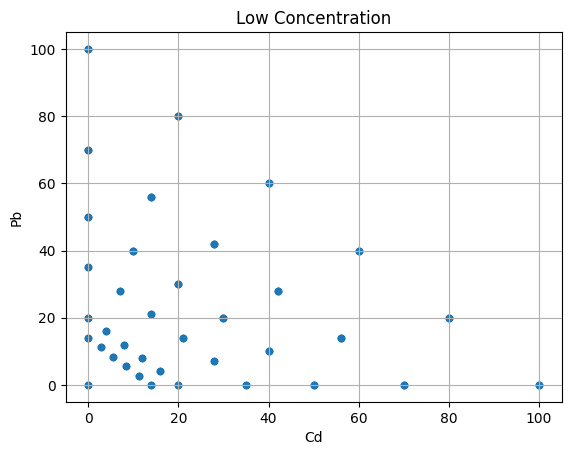

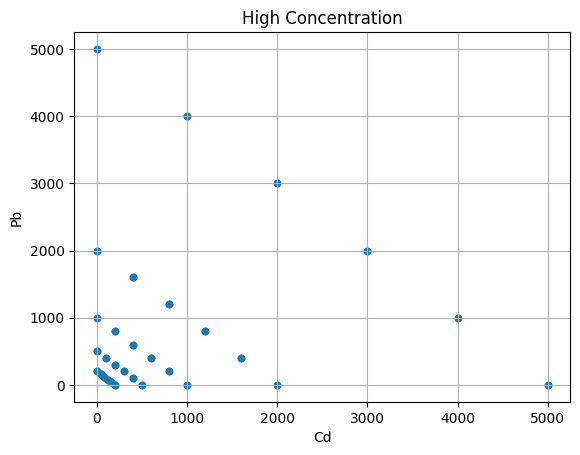

In [151]:
low_conc = water_df[water_df["c_total"]<= 100]
high_conc = water_df[water_df["c_total"] > 100]


ax = low_conc.plot.scatter(x="Cd", y="Pb")
ax.set_title("Low Concentration")
ax.grid()

ax = high_conc.plot.scatter(x="Cd", y="Pb")
ax.set_title("High Concentration")
ax.grid()

## Standardization of the dataset

In [152]:
#In this cell standardize the dataset features by removing the mean and scaling to unit variance. 
#In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3) 
#Print the 5 first samples (i.e. rows) of the scaled dataset
ss = StandardScaler()
water_df[["Mod1", "Mod2", "Mod3"]] = ss.fit_transform(water_df[["Mod1", "Mod2", "Mod3"]])
water_df.head(5)

,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0,0.0,0.0,-0.999216,-0.714208,-0.414911
1,0,0.0,0.0,-0.990800,-0.714373,-0.238335
2,0,0.0,0.0,-0.990539,-0.714125,0.020788
3,14,0.0,14.0,-1.001247,-0.713546,0.945465
4,14,0.0,14.0,-1.013727,-0.714125,0.569631


## C-index code 

In [153]:
def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels"""  
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

In [154]:
#test cindex function with following values
true_labels = [-1, 1, 1, -1, 1]
predictions = [0.60, 0.80, 0.75, 0.75, 0.70]
cindx = cindex(true_labels, predictions)
print(cindx)

0.75


## Functions

Include here all the functions that you need to run in the data analysis part.<br>
**Note:** using a leave-one-out and leave-replicas-out cross-validation from an already made package (e.g. Scikit-learn) is not accepted.

In [155]:
def LeaveOneOut(data):
    data = [*range(data)]
    for i in data:
        test_index = i
        train_index = []

        for j in data:
            if j != test_index:
                train_index.append(j)
        yield train_index, [test_index]

def LeaveReplicasOut(df_grouped, df_rows):
    for name, group in df_grouped: 
        test_index = list(group.index)
        train_index = []
        
        for j in range(df_rows):
            if j not in test_index:
                train_index.append(j)
        yield train_index, test_index



## Results for Leave-One-Out cross-validation

In [156]:
# In this cell run your script for Leave-One-Out cross-validation and print the corresponding results.

knn = KNeighborsRegressor(n_neighbors=3)

c_total_pred, c_total_true = [], []
Cd_pred, Cd_true = [], []
Pb_pred, Pb_true = [], []

for _, (train_index, test_index) in enumerate(LeaveOneOut(water_df.shape[0])):

    X_train, y_train = water_df.loc[train_index,
                                    features].values, water_df.loc[train_index, labels].values
    X_test, y_test = water_df.loc[test_index,
                                  features].values, water_df.loc[test_index, labels].values

    knn.fit(X_train, y_train)

    prediction = knn.predict(X_test)[0]
    true_label = y_test[0]

    c_total_pred.append(prediction[0])
    c_total_true.append(true_label[0])

    Cd_pred.append(prediction[1])
    Cd_true.append(true_label[1])

    Pb_pred.append(prediction[2])
    Pb_true.append(true_label[2])


In [157]:
print(f'The cindex for c_total is {cindex(c_total_true, c_total_pred)}\n')
print(f'The cindex for Cd is {cindex(Cd_true, Cd_pred)}\n')
print(f'The cindex for Pb is {cindex(Pb_true, Pb_pred)}\n')

The cindex for c_total is 0.9141907740422205

The cindex for Cd is 0.8995907629348144

The cindex for Pb is 0.8744519146448407



## Results for Leave-Replicas-Out cross-validation

In [158]:
# In this cell run your script for Leave-Replicas-Out cross-validation and print the corresponding results.
knn = KNeighborsRegressor(n_neighbors=3)
df_grouped = water_df.groupby(['c_total', 'Cd', 'Pb'])

c_total_pred, c_total_true = [], []
Cd_pred, Cd_true = [], []
Pb_pred, Pb_true = [], []

for fold, (train_index, test_index) in enumerate(LeaveReplicasOut(df_grouped, water_df.shape[0])):

    X_train, y_train = water_df.loc[train_index,
                                    features].values, water_df.loc[train_index, labels].values
    X_test, y_test = water_df.loc[test_index,
                                  features].values, water_df.loc[test_index, labels].values

    knn.fit(X_train, y_train)

    prediction = knn.predict(X_test)[0]
    true_label = y_test[0]

    c_total_pred.append(prediction[0])
    c_total_true.append(true_label[0])

    Cd_pred.append(prediction[1])
    Cd_true.append(true_label[1])

    Pb_pred.append(prediction[2])
    Pb_true.append(true_label[2])


In [159]:
print(f'The cindex for c_total is {cindex(c_total_true, c_total_pred)}\n')
print(f'The cindex for Cd is {cindex(Cd_true, Cd_pred)}\n')
print(f'The cindex for Pb is {cindex(Pb_true, Pb_pred)}\n')


The cindex for c_total is 0.833822091886608

The cindex for Cd is 0.7631826741996234

The cindex for Pb is 0.7688323917137476



## Interpretation of results
#### Answer the following questions based on the results obtained
- Which cross-validation approach had more optimistic results?
- Which cross-validation generalize better on unseen data? Why?

**The Leave One Out Cross Validation is more optimistic. Data from each group is dependent and one instance is used for testing and the remaining instances of the group are used for training leading to leakage, in turn leading the model to perform good.**

**The Leave Replica Out approach of cross validation has lower accuracy compared to the Leave One Out Cross Validation. But this lower accuracy is traded off with better generalization. Since the whole group is used for testing and removed in the training phases resulting in no leakage of replicas into the model.**